In [3]:
!pip3 install fer
!pip3 install cv2 
!pip3 install tensorflow>=1.7 
!pip3 install opencv-contrib-python>=3.2 --quiet

You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.7/bin/python3.7 -m pip install --upgrade pip' command.
ERROR: Could not find a version that satisfies the requirement cv2 (from versions: none)
ERROR: No matching distribution found for cv2
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.7/bin/python3.7 -m pip install --upgrade pip' command.
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.7/bin/python3.7 -m pip install --upgrade pip' command.


In [7]:
!pip3 show tensorflow

Name: tensorflow
Version: 2.5.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages
Requires: astunparse, six, keras-preprocessing, opt-einsum, h5py, termcolor, keras-nightly, typing-extensions, protobuf, google-pasta, wrapt, tensorboard, tensorflow-estimator, gast, numpy, flatbuffers, absl-py, grpcio, wheel
Required-by: fer


In [52]:
from fer import FER
import cv2 
import os 
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [10]:
print(tf.__version__)

2.5.0


## Easy detection

In [16]:
detector = FER()
img = cv2.imread('images/easy/angry-1.jpeg')
print(detector.detect_emotions(img))

[{'box': (158, 19, 78, 78), 'emotions': {'angry': 0.76, 'disgust': 0.0, 'fear': 0.06, 'happy': 0.05, 'sad': 0.04, 'surprise': 0.01, 'neutral': 0.08}}]


images/easy/angry-1.jpeg
('angry', 0.8)


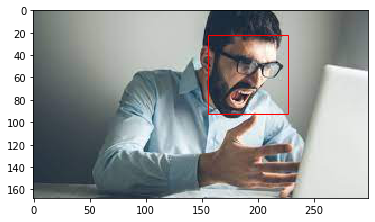

images/easy/angry-2.jpeg
('angry', 0.98)


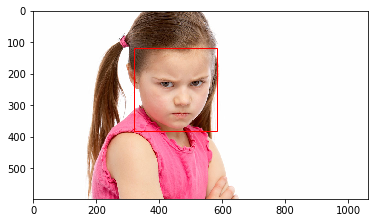

images/easy/digust.jpeg
('sad', 0.34)


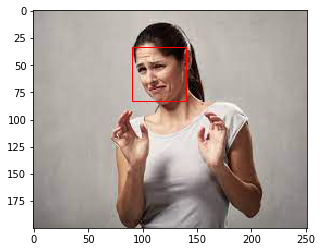

images/easy/disgust-2.jpeg
('angry', 0.5)


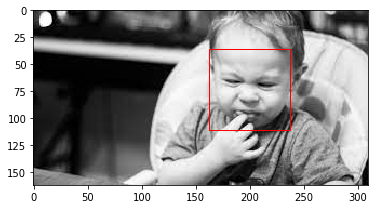

images/easy/fear-1.jpeg
('sad', 0.24)


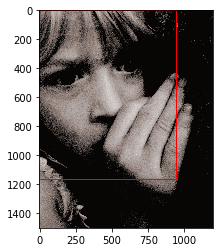

images/easy/fear-2.jpeg
('neutral', 0.27)


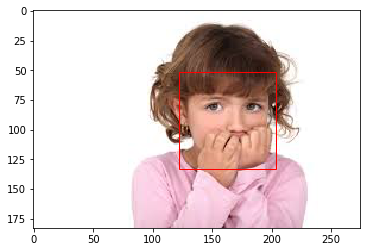

images/easy/fear-3.jpeg
('neutral', 0.84)


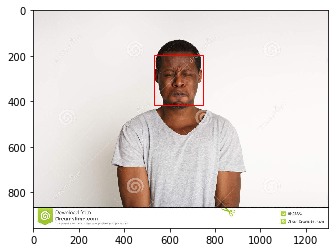

images/easy/happy-1.jpeg
('happy', 1.0)


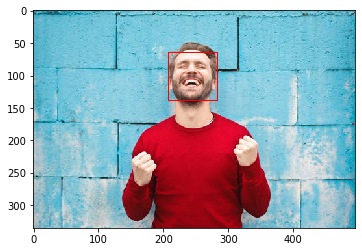

images/easy/happy-2.jpeg
('happy', 1.0)


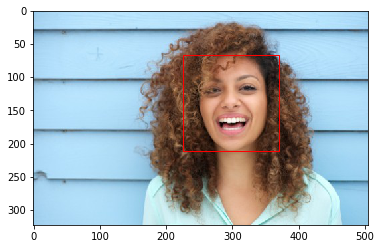

images/easy/neural-1.jpeg
('neutral', 0.43)


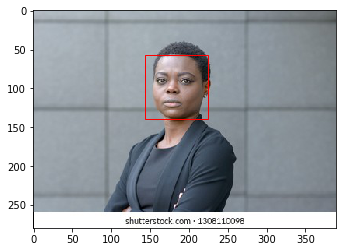

images/easy/neural-2.jpeg
('neutral', 0.84)


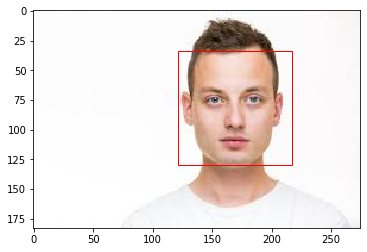

images/easy/sad-1.jpeg
('neutral', 0.47)


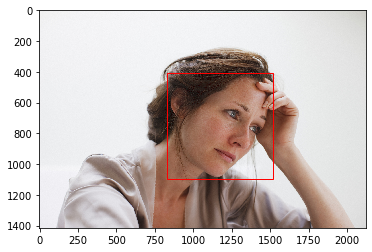

images/easy/sad-2.jpeg
('neutral', 0.9)


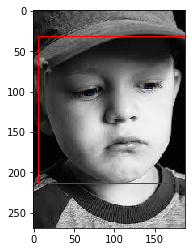

images/easy/surprise-1.jpeg
('surprise', 0.98)


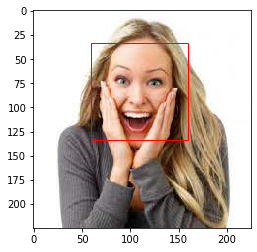

images/easy/surprise-2.jpeg
('surprise', 0.97)


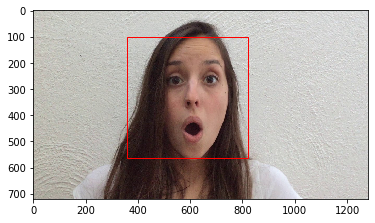

In [56]:
dir_name = 'images/easy'
files = os.listdir(dir_name)
detector = FER(mtcnn=True)
for f in sorted(files):
    file_name = dir_name + '/' + f
    print(file_name)
    img = plt.imread(file_name)
    plt.imshow(img)
    result = detector.detect_emotions(img)
    if result:
        box = result[0]['box']
        rect = patches.Rectangle((box[0], box[1]), box[2], box[3], linewidth=1, edgecolor='r', facecolor='none')
        plt.gca().add_patch(rect)
        answer = sorted(list(result[0]['emotions'].items()),key=lambda x:x[1])[-1]
        print(answer)
    plt.show()    
    
    
    



## Medium detection


images/medium/fear-1.jpeg
('surprise', 0.55)


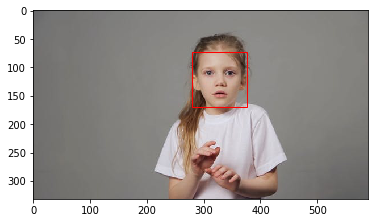

images/medium/fear-2.jpeg


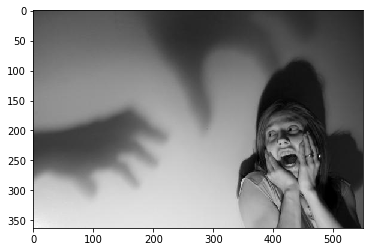

images/medium/happy-1.jpeg
('fear', 0.56)


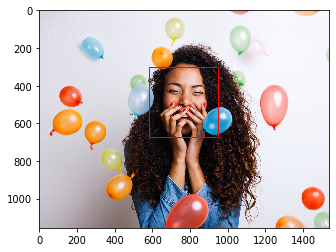

images/medium/sad-1.jpeg


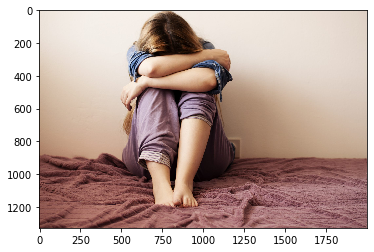

images/medium/sad-2.jpeg
('sad', 0.55)


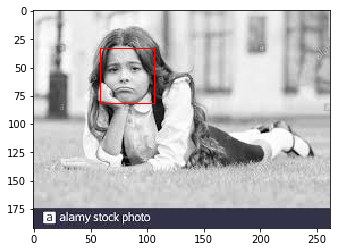

In [57]:
dir_name = 'images/medium'
files = os.listdir(dir_name)
detector = FER(mtcnn=True)
for f in sorted(files):
    file_name = dir_name + '/' + f
    print(file_name)
    img = plt.imread(file_name)
    plt.imshow(img)
    result = detector.detect_emotions(img)
    if result:
        box = result[0]['box']
        rect = patches.Rectangle((box[0], box[1]), box[2], box[3], linewidth=1, edgecolor='r', facecolor='none')
        plt.gca().add_patch(rect)
        answer = sorted(list(result[0]['emotions'].items()),key=lambda x:x[1])[-1]
        print(answer)
    plt.show()    
    
    
    

## Difficult detection

images/double/disgust.jpg
('disgust', 0.67)


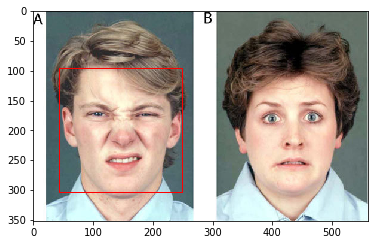

images/double/surprise-1.jpeg
('fear', 0.41)


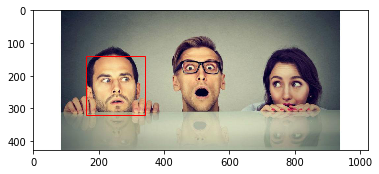

In [59]:
dir_name = 'images/double'
files = os.listdir(dir_name)
detector = FER(mtcnn=True)
for f in sorted(files):
    file_name = dir_name + '/' + f
    print(file_name)
    img = plt.imread(file_name)
    plt.imshow(img)
    result = detector.detect_emotions(img)
    if result:
        box = result[0]['box']
        rect = patches.Rectangle((box[0], box[1]), box[2], box[3], linewidth=1, edgecolor='r', facecolor='none')
        plt.gca().add_patch(rect)
        answer = sorted(list(result[0]['emotions'].items()),key=lambda x:x[1])[-1]
        print(answer)
    plt.show()    